<a href="https://colab.research.google.com/github/tassiogomes/Coursera_Capstone/blob/master/Capstone_Project_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can open the notebook at the link above to see the maps.

# Segmenting and Clustering Neighborhoods in Toronto
Note for reviewer: I have done the complete project in this one notebook so kindly check the respective parts for the sections/questions.

# Part 1

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Read link
from bs4 import BeautifulSoup

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [0]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url,'html.parser')
my_table = soup.find('tbody')

In [0]:

#collecting all the data in the form of table
table_data = []

for row in my_table.findAll('tr'):
    row_data = []
    
    for cell in row.findAll('td'):
        row_data.append(cell.text)
    
    if(len(row_data) > 0):
        data_item = {
            "Postalcode": row_data[0],
            "Borough": row_data[1],
            "Neighbourhood": row_data[2],
        }
    table_data.append(data_item)

In [21]:
# converting table_data into pandas dataframe
df = pd.DataFrame(table_data)
df.head()

,Postalcode,Borough,Neighbourhood
0,M9Z\n,Not assigned\n,\n
1,M1A\n,Not assigned\n,\n
2,M2A\n,Not assigned\n,\n
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n


In [22]:
type(df)

pandas.core.frame.DataFrame

### **DATA CLEANING**


1.   Ignore cells with a borough that is Not assigned
2.   If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
3.   More than one neighborhood can exist in one postal code area. These rows will be combined into one row with the neighborhoods separated with a comma.





In [25]:
df['Neighbourhood'] = df['Neighbourhood'].str.replace('\n','')
df['Neighbourhood'] = df['Neighbourhood'].str.replace('/',',')
df['Borough'] = df['Borough'].str.replace('\n','')
df['Postalcode'] = df['Postalcode'].str.replace('\n','')

# removing the cells where Borough is Not assigned
df_filtered = df.loc[df['Borough'] != 'Not assigned']
df_filtered.head()

,Postalcode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park , Harbourfront"
6,M6A,North York,"Lawrence Manor , Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


In [29]:
# Total dataframe
df_toronto = df_filtered.groupby(['Postalcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()
df_toronto

,Postalcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park"
7,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge"
8,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff , Cliffside West"


This is end of answer for Question 1

# Part 2


For me, when I tried to import geocoder python package, I got "ModuleNotFoundError" Hence, I used geographical coordinates of the neighborhoods using csv file from the server

In [30]:
df_locations = pd.read_csv('https://cocl.us/Geospatial_data')
df_locations.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Combining df_torornto and df_locations dataframes into a new dataframe

In [31]:
df_toronto_loc = pd.merge(left=df_toronto ,right=df_locations, left_on='Postalcode', right_on='Postal Code', how='inner')
df_toronto_loc.head()

,Postalcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


Removing duplicated column

In [39]:
df_toronto_loc.drop(['Postal Code'],axis=1,inplace=True)
df_toronto_loc.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [40]:
print('The final dataframe now has %d rows and %d columns' %(df_toronto_loc.shape[0], df_toronto_loc.shape[1]))

The final dataframe now has 103 rows and 5 columns


This is the end of solution for Question 2

# Part 3

Explore and cluster the neighborhoods in Toronto
Using geopy library to get the latitude and longitude values of Toronto City. Using Nominatim to convert an address into latitude and longitude values.

In [41]:
from geopy.geocoders import Nominatim
print ("geopy imported")

geopy imported


Selecting the Boroughs whos name has Toronto word in it

In [42]:
df_toronto = df_toronto[df_toronto['Borough'].str.contains('Toronto')].reset_index(drop=True)
print(df_toronto.shape)
df_toronto.head()

(39, 3)


,Postalcode,Borough,Neighbourhood
0,M4E,East Toronto,The Beaches
1,M4K,East Toronto,"The Danforth West , Riverdale"
2,M4L,East Toronto,"India Bazaar , The Beaches West"
3,M4M,East Toronto,Studio District
4,M4N,Central Toronto,Lawrence Park


In [43]:
import numpy as np
uniqueBoroughs=np.unique(df_toronto['Borough'])
print("So there are total %d Boroughs, which contain Toronto in their name" %(df_toronto['Borough'].nunique()))

So there are total 4 Boroughs, which contain Toronto in their name


In [44]:
uniqueBoroughs

array(['Central Toronto', 'Downtown Toronto', 'East Toronto',
       'West Toronto'], dtype=object)

In [45]:
df_toronto.tail()

,Postalcode,Borough,Neighbourhood
34,M6P,West Toronto,"High Park , The Junction South"
35,M6R,West Toronto,"Parkdale , Roncesvalles"
36,M6S,West Toronto,"Runnymede , Swansea"
37,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
38,M7Y,East Toronto,Business reply mail Processing CentrE


In [46]:
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [48]:
import folium # map rendering library
print ("folium imported")

folium imported


In [49]:
df_toronto_merge = df_toronto_loc[['Postalcode','Borough','Neighbourhood','Latitude','Longitude']]
df_toronto_merge.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [50]:
map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

# Adding markers on the map
for lat, lng, borough, neighborhood in zip(df_toronto_merge['Latitude'], df_toronto_merge['Longitude'], df_toronto_merge['Borough'], df_toronto_merge['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)

map_city

Again working with only those Boroughs which contain word 'Toronto' in their name

In [51]:
df_toronto_data = df_toronto_merge[df_toronto_merge['Borough'].str.contains('Toronto')]
df_toronto_data

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park , Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Summerhill West , Rathnelly , South Hill , For...",43.686412,-79.400049


### Using the Foursquare API to explore the neighborhoods

In [52]:
CLIENT_ID = '2PHSHTMCRIGC4KE2PN3KFZSWCAOHIXZVCU3JW2J5FRPCOUPL' # your Foursquare ID
CLIENT_SECRET = 'VQY413TDH4D0XYT5YJRTJYB2WLIIY1O40NTCWOSHGBQHBZYC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2PHSHTMCRIGC4KE2PN3KFZSWCAOHIXZVCU3JW2J5FRPCOUPL
CLIENT_SECRET:VQY413TDH4D0XYT5YJRTJYB2WLIIY1O40NTCWOSHGBQHBZYC
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

In [0]:
# defining radius and limit of venues to get
radius=500
LIMIT=100

In [0]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
# getting venues in the 500 meters radius
toronto_venues = getNearbyVenues(names=df_toronto_data['Neighbourhood'],
                                 latitudes=df_toronto_data['Latitude'],
                                 longitudes=df_toronto_data['Longitude']
                                )
toronto_venues

The Beaches
The Danforth West , Riverdale
India Bazaar , The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park , Summerhill East
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
Rosedale
St. James Town , Cabbagetown
Church and Wellesley
Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
Roselawn
Forest Hill North & West
The Annex , North Midtown , Yorkville
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Stn A PO Boxes
First Canadian Place , Underground city
Christie
Dufferin , Dovercourt Village
Little Portugal , Trinity
Brockton , Parkdale Village , Exhibition Place
High Park , 

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West , Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West , Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,"The Danforth West , Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
7,"The Danforth West , Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West , Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
9,"The Danforth West , Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio


In [57]:
print("This resulted in total %d venues" %(toronto_venues.shape[0]))

This resulted in total 1683 venues


In [58]:
# having a look at some of the found venues
toronto_venues.head(15)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West , Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant
5,"The Danforth West , Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop
6,"The Danforth West , Riverdale",43.679557,-79.352188,Mezes,43.677962,-79.350196,Greek Restaurant
7,"The Danforth West , Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
8,"The Danforth West , Riverdale",43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop
9,"The Danforth West , Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio


In [59]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 233 uniques categories.


### To analyse each neighbourhood, converting 'Venue Category' from categorical to numerical using One Hot Encoding

In [60]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column to this dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighbourhood']

# moving neighborhood column to make it as first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [61]:
toronto_onehot.columns

Index(['Yoga Studio', 'Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop', 'Aquarium',
       ...
       'Toy / Game Store', 'Trail', 'Train Station', 'Transportation Service',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wings Joint', 'Women's Store'],
      dtype='object', length=233)

In [62]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Transportation Service,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.035088,0.000000,0.000000,0.00,0.017544,0.017544,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.0000,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.017544,0.035088,0.000000,0.00,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.105263,0.000000,0.000000,0.000000,0.00,0.00,0.017544,0.000000,0.017544,0.000000,0.017544,0.00000,0.017544,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0

Building the Top 10 venues into a new dataframe

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
    
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(39, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant,Seafood Restaurant,Beer Bar,Farmers Market,Greek Restaurant
1,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Grocery Store,Gym,Pet Store,Performing Arts Venue,Nightclub,Italian Restaurant,Intersection
2,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Recording Studio,Restaurant,Burrito Place,Fast Food Restaurant,Auto Workshop,Farmers Market,Spa,Smoke Shop
3,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Sculpture Garden,Rental Car Location,Plane,Bar,Boutique
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Japanese Restaurant,Sandwich Place,Salad Place,Department Store,Bubble Tea Shop,Thai Restaurant,Dessert Shop


## Clustering the Neighbourhoods using kmeans clustering

In [65]:
from sklearn.cluster import KMeans
print ("Imported")

Imported


In [0]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

### Finding the optimal number of clusters for clustering the neighbourhoods

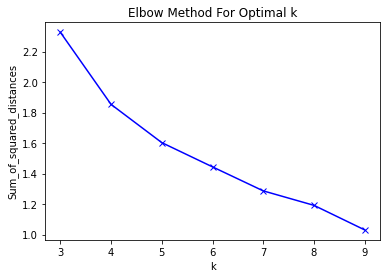

In [67]:
 import matplotlib.pyplot as plt
%matplotlib inline
Sum_of_squared_distances = []
K = range(3,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the above graph the elbow is at k=6, hence clustering the neighborhoods in 6 clusters

In [68]:
# set number of clusters
kclusters = 6

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [69]:
toronto_merged = df_toronto_data
# adding clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

print(toronto_merged.shape)
toronto_merged.head()

(39, 16)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
41,M4K,East Toronto,"The Danforth West , Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Pub,Pizza Place
42,M4L,East Toronto,"India Bazaar , The Beaches West",43.668999,-79.315572,0,Park,Sushi Restaurant,Pet Store,Movie Theater,Pub,Restaurant,Burrito Place,Liquor Store,Sandwich Place,Brewery
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Bookstore,Sandwich Place
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Swim School,Bus Line,Farmers Market,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


### Creat map

In [70]:
import matplotlib.cm as cm
import matplotlib.colors as colors
print ("Imported")

Imported


In [71]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Finally, checking what is there in each cluster

### Cluster 1

In [72]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,0,Health Food Store,Trail,Pub,Women's Store,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
41,East Toronto,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Bookstore,Ice Cream Shop,Furniture / Home Store,Fruit & Vegetable Store,Pub,Pizza Place
42,East Toronto,0,Park,Sushi Restaurant,Pet Store,Movie Theater,Pub,Restaurant,Burrito Place,Liquor Store,Sandwich Place,Brewery
43,East Toronto,0,Café,Coffee Shop,Gastropub,Bakery,Brewery,American Restaurant,Yoga Studio,Comfort Food Restaurant,Bookstore,Sandwich Place
44,Central Toronto,0,Park,Swim School,Bus Line,Farmers Market,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
45,Central Toronto,0,Park,Hotel,Breakfast Spot,Sandwich Place,Food & Drink Shop,Department Store,Convenience Store,Cosmetics Shop,Electronics Store,Eastern European Restaurant
46,Central Toronto,0,Coffee Shop,Clothing Store,Sporting Goods Shop,Health & Beauty Service,Fast Food Restaurant,Diner,Dessert Shop,Mexican Restaurant,Park,Gift Shop
47,Central Toronto,0,Pizza Place,Dessert Shop,Sandwich Place,Thai Restaurant,Café,Gym,Sushi Restaurant,Coffee Shop,Italian Restaurant,Farmers Market
48,Central Toronto,0,Playground,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
50,Downtown Toronto,0,Park,Playground,Trail,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


### Cluster 2

In [73]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] +list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Downtown Toronto,1,Coffee Shop,Hotel,Café,Restaurant,Gastropub,Italian Restaurant,American Restaurant,Seafood Restaurant,Bar,Bakery


### Cluster 3

In [74]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] +list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,Downtown Toronto,2,Coffee Shop,Restaurant,Café,Gym,Thai Restaurant,Bakery,Pizza Place,Salad Place,Hotel,Concert Hall


### Cluster 4

In [75]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] +list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Downtown Toronto,3,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Gastropub,Café,Pub,Yoga Studio,Hotel
67,Downtown Toronto,3,Café,Coffee Shop,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Bar,Arts & Crafts Store,Dessert Shop,Park


### Cluster 5

In [76]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] +list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Downtown Toronto,4,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Sculpture Garden,Rental Car Location,Plane,Bar,Boutique


### Cluster 6

In [77]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] +list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Central Toronto,5,Pub,Coffee Shop,Light Rail Station,Pizza Place,Sushi Restaurant,Bank,Sports Bar,Fried Chicken Joint,Restaurant,Supermarket


From above clustering, the Cluster 1 seems to be more widespread which covers all the boroughs which have word 'Toronto' in their name

# Finished Notebook by Tassio Gomes